In [44]:
import pandas as pd
import datetime
from matplotlib import pyplot

In [2]:
ifile = open("data/sample_data.csv", 'r')
ofile = open("data/sample_data_format.csv", 'w')
c=0
for l in ifile:
    if c==0:
        c+=1
        ofile.write("DATE" + ','+"MAX_TEMP"+','+"MIN_TEMP"+'\n')
        continue
    line = l.split(',')
    time = line[3]
    time=time.split('/')
    ofile.write(time[2]+'-'+time[0]+'-'+time[1]+','+line[4]+','+line[5]+'\n')
ifile.close()
ofile.close()





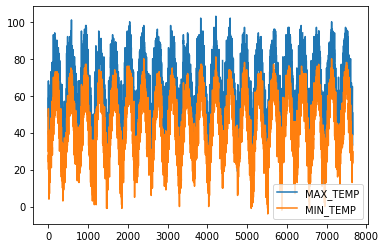

In [28]:
#read in csv
df = pd.read_csv("data/sample_data_format.csv", header=0)
df.plot()
pyplot.show() #shows cyclic data


In [29]:
# formatting dataframe
df.index=pd.to_datetime(df['DATE'])
df=df.drop(columns=['DATE'])
df.head()

,MAX_TEMP,MIN_TEMP
DATE,,
2000-01-01,49.0,30.0
2000-01-02,60.0,31.0
2000-01-03,63.0,53.0
2000-01-04,68.0,47.0
2000-01-05,47.0,26.0


In [30]:
#remove leap years
print(df.shape)
df.drop(df.loc[["2000-2-29","2004-2-29", "2008-2-29", "2012-2-29", "2016-2-29", "2020-2-29"], :].index,inplace=True)
print(df.shape)

(7659, 2)
(7653, 2)


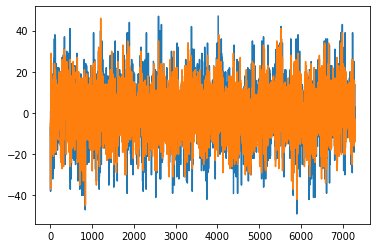

In [46]:
#DAYS seasonal adjustment -- using differencing
X = df.values
diff = list()
days_in_year=365
for i in range(days_in_year, len(X)):

	Maxvalue = X[i][0]-X[i-366][0] # max temp
	Minvalue = X[i][1]-X[i-366][1] # min temp
	diff.append([Maxvalue,Minvalue])

pyplot.plot(diff)
pyplot.show()

#saving dataframe
d = pd.DataFrame(diff, index=df.index[days_in_year:len(df)], columns=["MAX_TEMP", "MIN_TEMP"])
d.to_pickle("./data/sample_data_days.pkl")

             MAX_TEMP   MIN_TEMP
DATE                            
2000-01-31  38.709677  22.161290
2000-02-29  43.607143  26.821429
2000-03-31  56.419355  35.129032
2000-04-30  58.333333  39.266667
2000-05-31  72.225806  50.354839
2000-06-30  79.533333  59.733333
2000-07-31  79.677419  61.064516
2000-08-31  79.225806  62.064516
2000-09-30  73.300000  53.466667
2000-10-31  65.793103  42.344828
2000-11-30  50.600000  33.233333
2000-12-31  36.354839  19.870968
2001-01-31  37.580645  19.741935


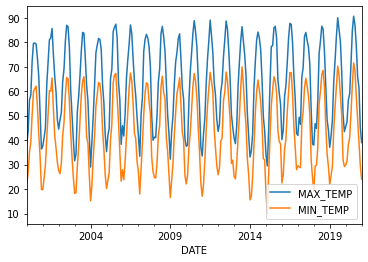

In [34]:
# MONTHS
resample = df.resample('M')
monthly_mean = resample.mean()
print(monthly_mean.head(13))
monthly_mean.plot()
pyplot.show()

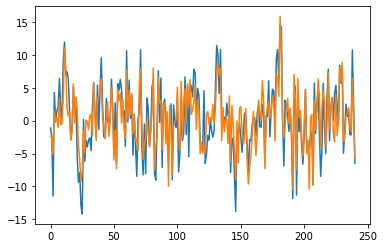

In [45]:
X = monthly_mean.values
diff = list()
months_in_year = 12
for i in range(months_in_year, len(monthly_mean)):
	Maxvalue = X[i][0] - X[i - months_in_year][0]
	Minvalue = X[i][1] - X[i - months_in_year][1]
	diff.append([Maxvalue, Minvalue])
pyplot.plot(diff)
pyplot.show()

#saving dataframe
mm = pd.DataFrame(diff, index=monthly_mean.index[months_in_year:len(monthly_mean)], columns=["MAX_TEMP", "MIN_TEMP"])
mm.to_pickle("./data/sample_data_mm.pkl")


In the future, models seasonal component directly and then subtract from difference (https://machinelearningmastery.com/time-series-seasonality-with-python/)